In [2]:
#/export
from fastai.vision.all import *
import gradio as gr
from fastbook import *
def is_cat(x): return x[0].isupper()

In [4]:
urls = search_images_ddg('dog photos', max_images=1)
dest = Path('dog.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

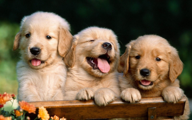

In [3]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [4]:
#/export
learn = load_learner('model.pkl')

In [5]:
learn.predict(im)

('False', tensor(0), tensor([1.0000e+00, 5.9419e-08]))

In [6]:
#/export
categories = ('Dog','Cat')

def classify_image(img):
  pred,idx,prob = learn.predict(img)
  return dict(zip(categories,map(float,prob)))

In [7]:
classify_image(im)

{'Dog': 1.0, 'Cat': 5.941916825236149e-08}

In [8]:
#/export
image = gr.Image()
label = gr.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [9]:
m = learn.model